## What is Word Embedding ???

* Word Embedding là việc chuyển dổi các từ riêng lẻ thành các vector số 
* Việc chuyển đổi văn bản thành số cho phép người dùng cung cấp đầu vào cho các mô hình Ml/DL  
* Cách đơn giản nhất để nhúng là One-hot-Encoding (OHE) 
    - Tuy nhiên kích thước lớn - lãng phí 
    - Không tận dụng được các đặc điểm của từ 

### Word2Vec

* Sử dụng các Dense Vector --> tránh lãng phí tài nguyên hơn 
* Tận dụng được các đặc điểm của từ thông qua sự xuất hiện của nó trong data 
* Nhóm được các vector của các từ tương tự lại với nhau 

* Có hai kiến trúc chính của word2vec  
    * Skip-gram : Từ trung tâm sẽ dự đoán các ngữ cảnh ( Các từ xung quanh )

   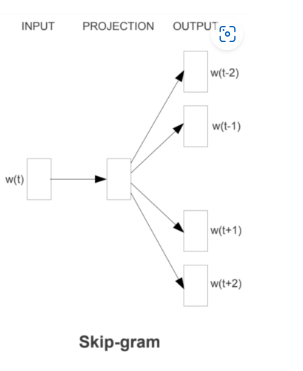
    
    * CBOW : Các ngữ cảnh ( các từ xung quanh ) dự đoán từ trung tâm 

    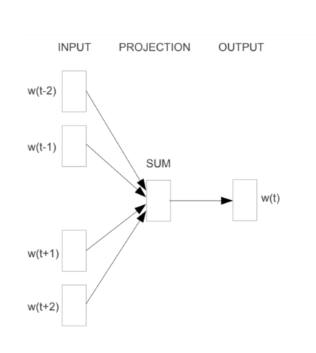

-----------------------------------------------------------------------------
### SKIP-GRAM

In [23]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
raw = "He is the king . The king is royal . She is the royal queen"
raw = raw.lower()

Tách từng từ trong bộ data 

In [3]:
words = []
for w in raw.split():
    if w != '.':
        words.append(w)
words

['he',
 'is',
 'the',
 'king',
 'the',
 'king',
 'is',
 'royal',
 'she',
 'is',
 'the',
 'royal',
 'queen']

In [4]:
words = set(words)
words

{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

Tạo từ điển để gọi qua lại giữa word và int 

In [5]:
word2int = {}
int2word = {}

vocab_size = len(words)

for i,word in enumerate(words):
    word2int[word] = i 
    int2word[i] = word

In [6]:
word2int

{'the': 0, 'king': 1, 'he': 2, 'she': 3, 'royal': 4, 'queen': 5, 'is': 6}

In [7]:
int2word

{0: 'the', 1: 'king', 2: 'he', 3: 'she', 4: 'royal', 5: 'queen', 6: 'is'}

Phân chia thành các câu có nghĩa 

In [8]:
sentences = []
for s in raw.split('.'):
    sentences.append(s.split())
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

Với phương pháp skip-gram thì cần các từ trung tâm làm đầu vào và dự đoán các từ xung quanh với bán kính WINDOWN_SIZE 

In [9]:
data = [] 
WINDOWN_SIZE = 2 
for s in sentences:
    for word_index, word in enumerate(s):
        for nb_word in s[max(word_index - WINDOWN_SIZE,0) : min(word_index + WINDOWN_SIZE,len(s)) + 1]:
            if nb_word != word:
                data.append([word,nb_word])

Có được bộ data 
Ví dụ với từ "he" sẽ là đầu vào để dự đoán các từ xung quanh với bán kính 2 -> 'is' & 'she'

In [10]:
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

Sử dụng one-hot-encoding của từng từ làm đầu vào của mạng 

In [11]:
def one_hot(data_index,vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_index] = 1
    return temp 


In [12]:
x_train = []
y_train = []

for word in data: 
    x_train.append(one_hot(word2int[word[0]],vocab_size))
    y_train.append(one_hot(word2int[word[1]],vocab_size))
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [13]:
print(x_train.shape) 
y_train.shape

(34, 7)


(34, 7)

In [65]:
x_train[0],y_train[0]


(array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1.]))

Lựa chọn số chiều để nhúng từ 

In [15]:
EMBEDDING_DIM = 5 


Build mạng neural từ đầu 

In [16]:
# def init_para(dim):
#     w1 = np.random.rand(dim,x_train.shape[1])
#     b1 = np.random.rand(dim,1)
#     w2 = np.random.rand()
#     b2 = np.random.rand()
#     return w1,b1,w2,b2 
# def forward(w1,b1,w2,b2,X):
#     z1 = np.dot(w1,X) + b1 
#     a1 = np.relu(z1)
#     z2 = np.dot(w2,a1) + b2 
#     a2 = np.softmax(z2)
#     return z1,a1,z2,a2
# def backprop(z1,a1,z2,a2,w1,w2,X,Y):
#     dz2 = a2 - Y 
#     dw2 = 
#     db2 = 
#     dz1
#     dw1 = 
#     db1 = 
#     return dw1,db1,dw2,db2
# def update_para(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
#     w1 = w1 - alpha*dw1 
#     b1 = b1 - alpha*db1 
#     w2 = w2 - alpha*dw2 
#     b2 = b2 - alpha*db2 
#     return w1,b1,w2,b2
# def gradient(X,Y,alpha,inter):
#     w1,b1,w2,b2 = init_para(dim) 
#     for i in range(iters):
#         z1 , a1,z2,a2 = forward(w1,b1,w2,b2,X)
#         dw1,db1,dw2,db2 = backprop(z1,a1,z2,a2,w1,w2,X,Y)
#         w1,b1,w2,b2 = update_para(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
#     return w1, b1, w2, b2 



Build mạng neural bằng thư viện 

In [17]:
from tensorflow.keras.layers import Flatten,Dense

In [18]:
model = tf.keras.models.Sequential() 
model.add(Flatten(input_shape=[7]))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(7,activation ='softmax'))
 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 7)                 42        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['acc'])

In [27]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 2.0355 - acc: 0.1765
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 2.0315 - acc: 0.1765
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 2.0270 - acc: 0.1765
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 2.0232 - acc: 0.1765
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 2.0221 - acc: 0.1765
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 2.0197 - acc: 0.1765
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 2.0176 - acc: 0.1765
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 2.0136 - acc: 0.1765
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 2.0094 - acc: 0.1765
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 2.0056 - acc: 0.1765


In [31]:
history.history

{'loss': [2.0355029106140137,
  2.0315093994140625,
  2.0270113945007324,
  2.0231974124908447,
  2.0221118927001953,
  2.0196616649627686,
  2.017608642578125,
  2.0136098861694336,
  2.0094032287597656,
  2.005563735961914],
 'acc': [0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886,
  0.1764705926179886]}

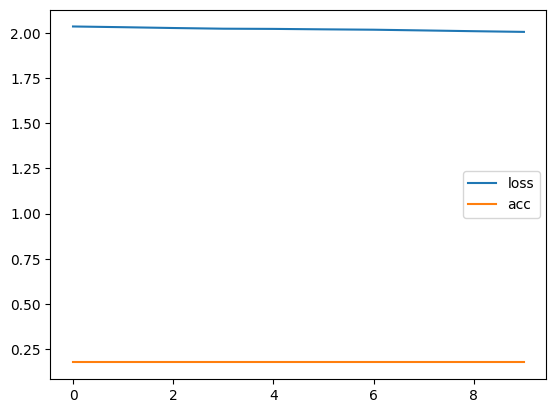

In [37]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='acc')
plt.legend()

In [38]:
w , b = model.layers[1].get_weights()

In [39]:
w.shape , b.shape

((7, 5), (5,))

In [50]:
vetors = np.dot(x_train,w) + b 

Có thể lấy vector nhúng = w + b vì onehot*w = w 

In [57]:
words = np.array(words)

In [43]:
vocab_onehot = np.zeros((vocab_size,vocab_size))
for i in range(len(word2int)):
    vocab_onehot[i][i] = 1

In [44]:
vocab_onehot

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [46]:
vocab_emd = vocab_onehot.dot(w) + b

In [47]:
vocab_emd

array([[-0.57174604, -0.1289999 ,  0.04102988,  0.02048711,  0.31804203],
       [ 0.62314684,  0.45108642, -0.30191304,  0.09926893, -0.62333367],
       [-0.26178079, -0.55287452, -0.28692056, -0.23732733, -0.42090268],
       [ 0.3273823 ,  0.09390305, -0.04217549,  0.63998774,  0.54126259],
       [-0.24835517,  0.4565195 , -0.196539  , -0.31515082, -0.60821978],
       [ 0.11918499, -0.51686997, -0.10467656,  0.24527634,  0.42371498],
       [-0.55583971, -0.04847063,  0.51470517, -0.28535333,  0.21076061]])

Hàm tìm từ đồng nghĩa nhất trong bộ dữ liệu 

In [48]:
def distance(vec1,vec2):
    return np.sqrt(np.sum(vec1-vec2)**2)
def find_closet(word_index,vec):
    min_dist = 10000
    min_index = -1 

    query_vector = vec[word_index]
    for index,vector in enumerate(vec):
        if distance(vector,query_vector) < min_dist and not np.array_equal(vector,query_vector):
            min_dist = distance(vector,query_vector)
            min_index = index 
    return min_index

In [49]:
print(int2word[find_closet(word2int['king'],vocab_emd)])

queen


Dùng PCA giảm chiều để visua 

In [50]:
from sklearn.decomposition import PCA 

In [52]:
model = PCA(n_components=2,random_state=0)
vectors = model.fit_transform(vocab_emd)

In [60]:
words , vectors

({'he', 'is', 'king', 'queen', 'royal', 'she', 'the'},
 array([[-0.86939142, -0.49412404],
        [ 0.89973793,  0.43643058],
        [ 0.29051887, -0.95686926],
        [-0.38512159,  0.92286584],
        [ 0.86257508, -0.50592907],
        [-0.8164377 ,  0.57743353],
        [-0.63183036, -0.7751067 ]]))

In [57]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

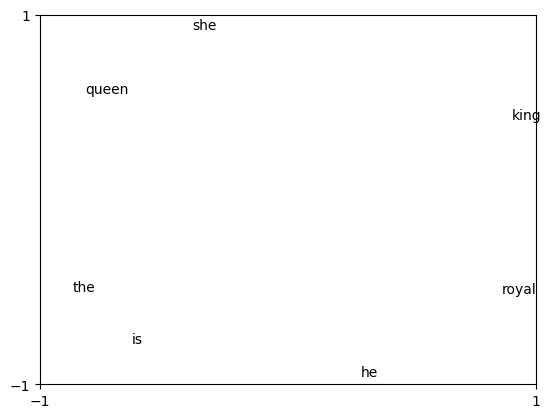

In [63]:
fig ,ax = plt.subplots()
plt.xticks((-1,1))
plt.yticks((-1,1))
for word in words:
    ax.annotate(word,(vectors[word2int[word]][0],vectors[word2int[word]][1]))
plt.show()

--------------------------------------------------------------------------------
### CBOW

Với CBOW làm tương tự nhưng h các từ xung quanh sẽ x và từ trung tâm là y 

In [70]:
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [87]:
data = [] 
WINDOWN_SIZE = 2 
for s in sentences:
    for word_index, word in enumerate(s):
        for i in s[max(0,word_index+1-WINDOWN_SIZE):min(vocab_size,word_index+WINDOWN_SIZE+1)]:
            if word != i:
                print(word,i)

he is
he the
is he
is the
is king
the is
the king
king the
the king
the is
king the
king is
king royal
is king
is royal
royal is
she is
she the
is she
is the
is royal
the is
the royal
the queen
royal the
royal queen
queen royal
